In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import missingno as msno
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from imblearn.over_sampling import RandomOverSampler

In [3]:
df = pd.read_csv('/content/train.csv')
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income_>50K
0,67,Private,366425,Doctorate,16,Divorced,Exec-managerial,Not-in-family,White,Male,99999,0,60,United-States,1
1,17,Private,244602,12th,8,Never-married,Other-service,Own-child,White,Male,0,0,15,United-States,0
2,31,Private,174201,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,1
3,58,State-gov,110199,7th-8th,4,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,0
4,25,State-gov,149248,Some-college,10,Never-married,Other-service,Not-in-family,Black,Male,0,0,40,United-States,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43957 entries, 0 to 43956
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              43957 non-null  int64 
 1   workclass        41459 non-null  object
 2   fnlwgt           43957 non-null  int64 
 3   education        43957 non-null  object
 4   educational-num  43957 non-null  int64 
 5   marital-status   43957 non-null  object
 6   occupation       41451 non-null  object
 7   relationship     43957 non-null  object
 8   race             43957 non-null  object
 9   gender           43957 non-null  object
 10  capital-gain     43957 non-null  int64 
 11  capital-loss     43957 non-null  int64 
 12  hours-per-week   43957 non-null  int64 
 13  native-country   43194 non-null  object
 14  income_>50K      43957 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 5.0+ MB


In [5]:
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,income_>50K
count,43957.000000,4.395700e+04,43957.000000,43957.000000,43957.000000,43957.000000,43957.000000
mean,38.617149,1.896730e+05,10.074118,1093.559797,88.246491,40.407694,0.239279
std,13.734401,1.058215e+05,2.575092,7570.536063,404.588410,12.400303,0.426648
min,17.000000,1.349200e+04,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.174960e+05,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,1.781000e+05,10.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,2.376710e+05,12.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000


In [6]:
categorical_features = []
categorical_features = df.select_dtypes(include=['object']).copy()
categorical_features.columns

Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'gender', 'native-country'],
      dtype='object')

<Axes: >

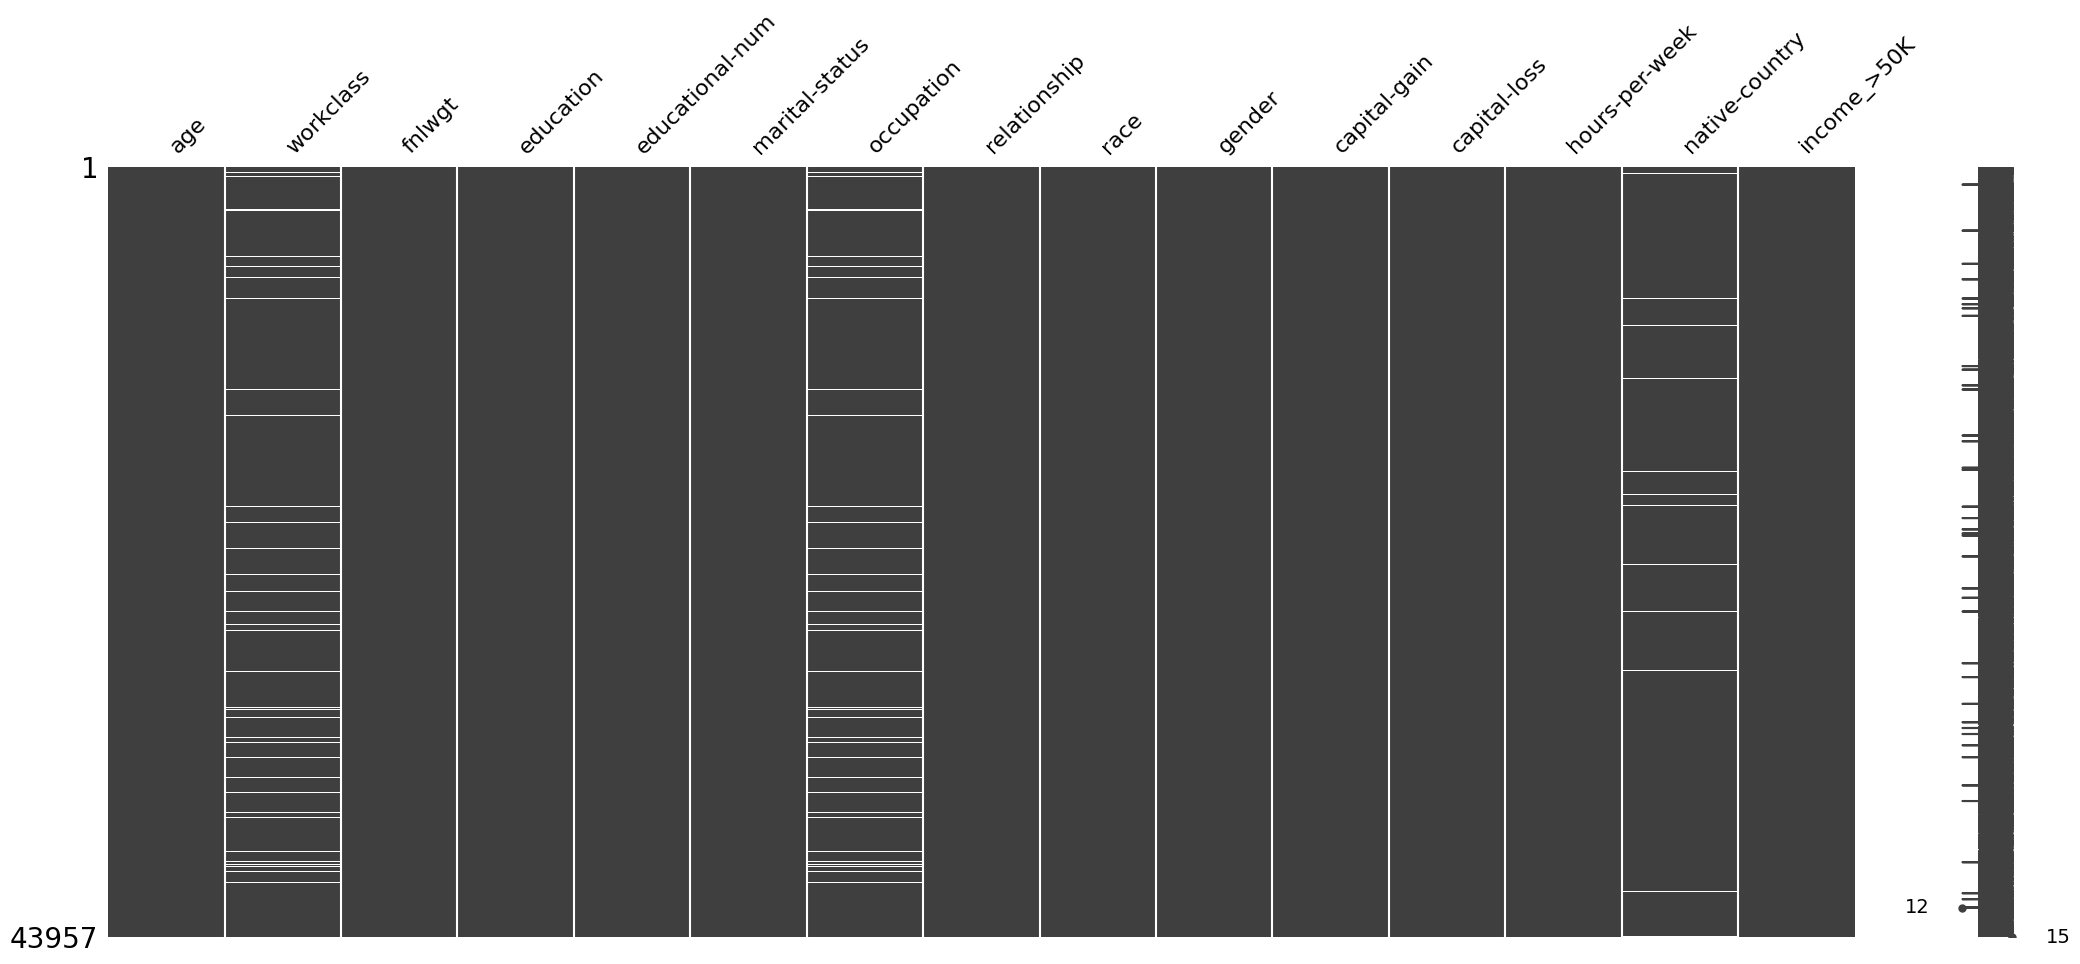

In [7]:
msno.matrix(df)

<Axes: >

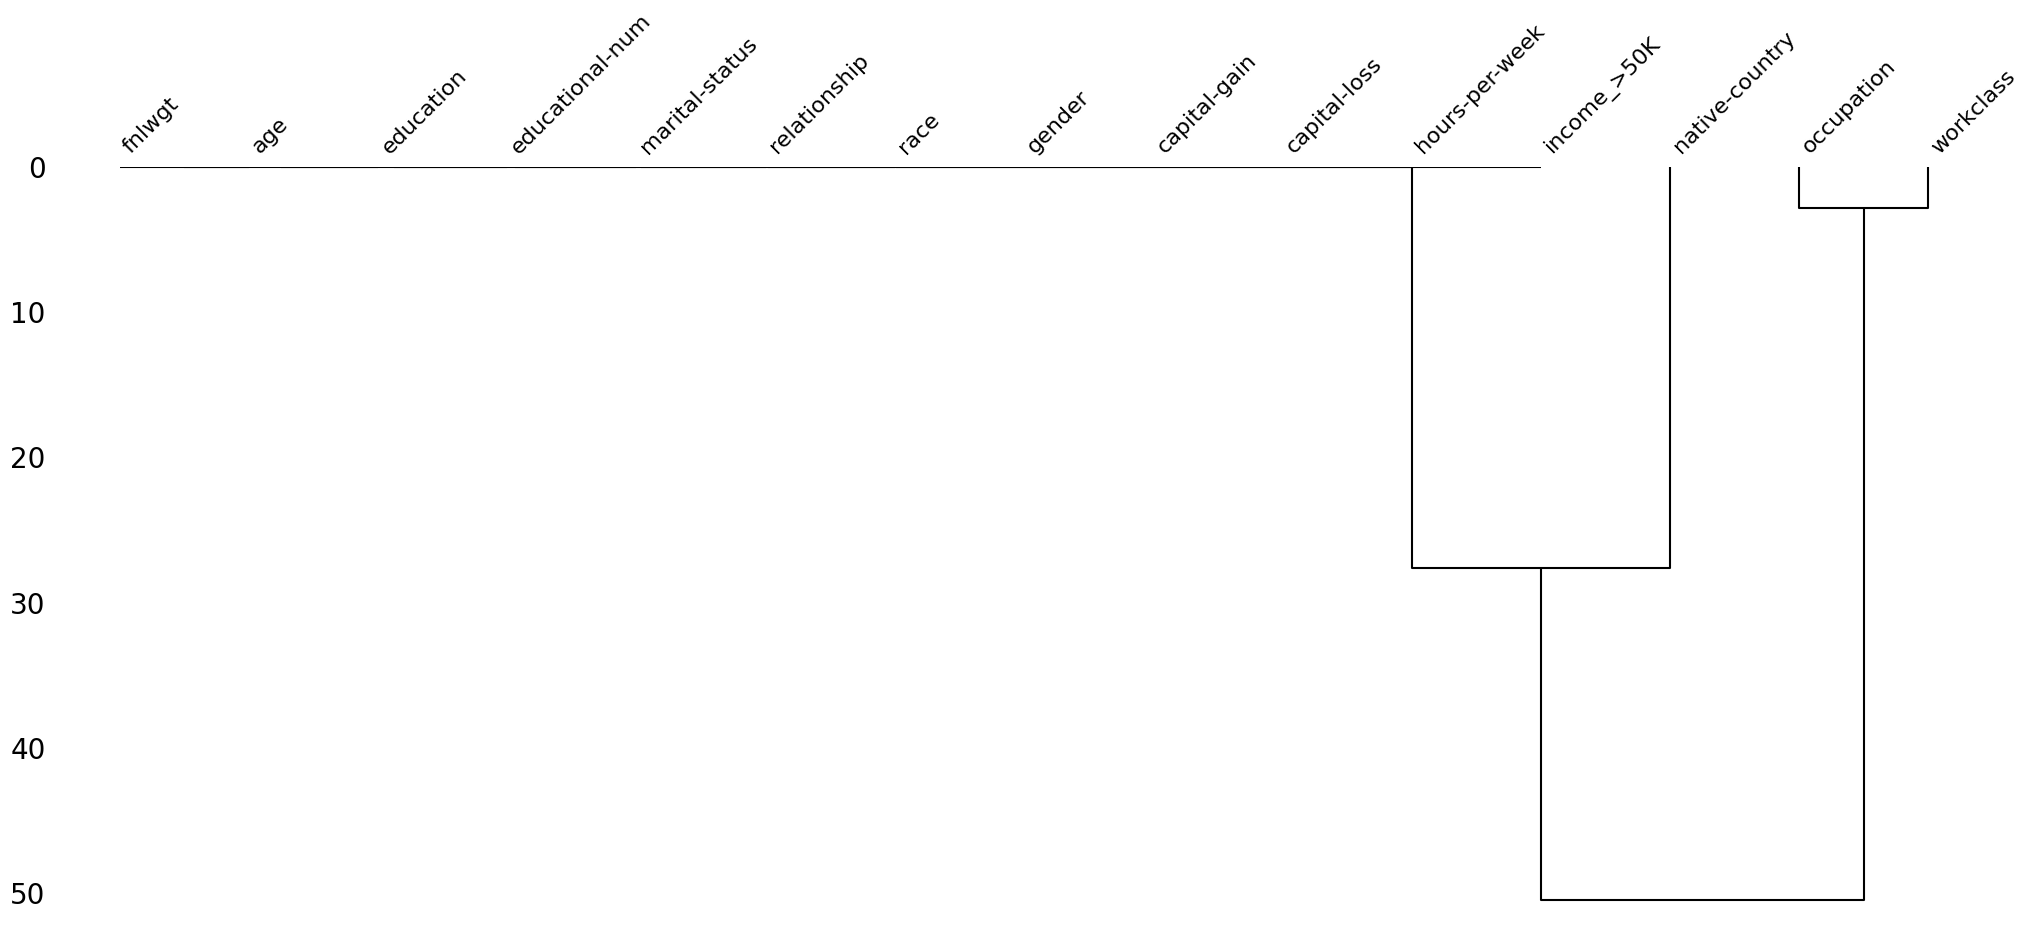

In [8]:
msno.dendrogram(df)

In [10]:
missing = pd.DataFrame(round(df.isna().sum()/df.isna().count()*100,2))
missing.rename(columns={0:'Percentage of missing values'}, inplace=True)
missing['Percentage of missing values']=missing['Percentage of missing values'].map(str)+'%'
missing

,Percentage of missing values
age,0.0%
workclass,5.68%
fnlwgt,0.0%
education,0.0%
educational-num,0.0%
marital-status,0.0%
occupation,5.7%
relationship,0.0%
race,0.0%
gender,0.0%


In [11]:
df = df.fillna('nan')

In [12]:
column=[]
column =(pd.concat([categorical_features, df['income_>50K']], axis=1))
column.loc[column['income_>50K']==0, ['income_>50K']] ='No'
column.loc[column['income_>50K']==1, ['income_>50K']] ='Yes'
column.head()

,workclass,education,marital-status,occupation,relationship,race,gender,native-country,income_>50K
0,Private,Doctorate,Divorced,Exec-managerial,Not-in-family,White,Male,United-States,Yes
1,Private,12th,Never-married,Other-service,Own-child,White,Male,United-States,No
2,Private,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,Yes
3,State-gov,7th-8th,Married-civ-spouse,Transport-moving,Husband,White,Male,United-States,No
4,State-gov,Some-college,Never-married,Other-service,Not-in-family,Black,Male,United-States,No


**Visualization**

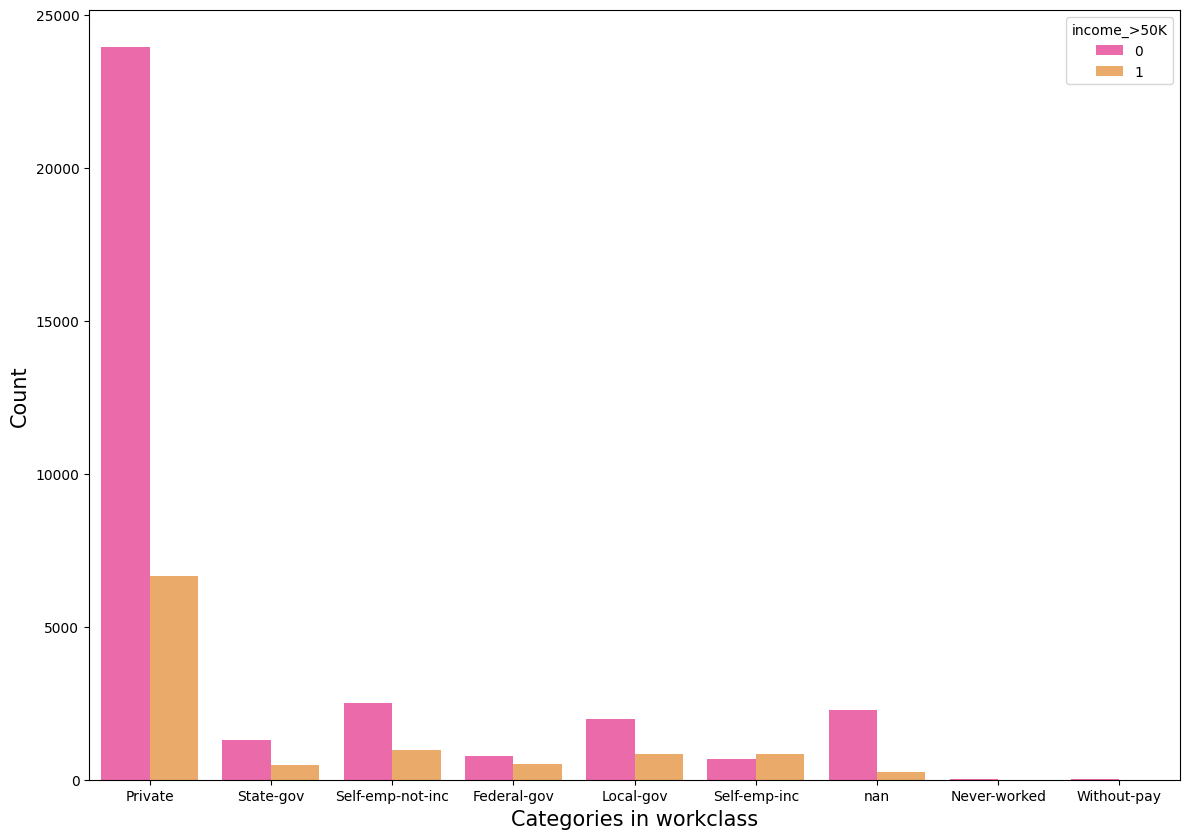

In [76]:
ax= sns.countplot(x='workclass', hue='income_>50K', palette='spring',data=df)
plt.rcParams["figure.figsize"] = [7.00, 8.50]
plt.rcParams["figure.autolayout"] = True
plt.ylabel("Count", size=15);
plt.xlabel("Categories in workclass", size=15);

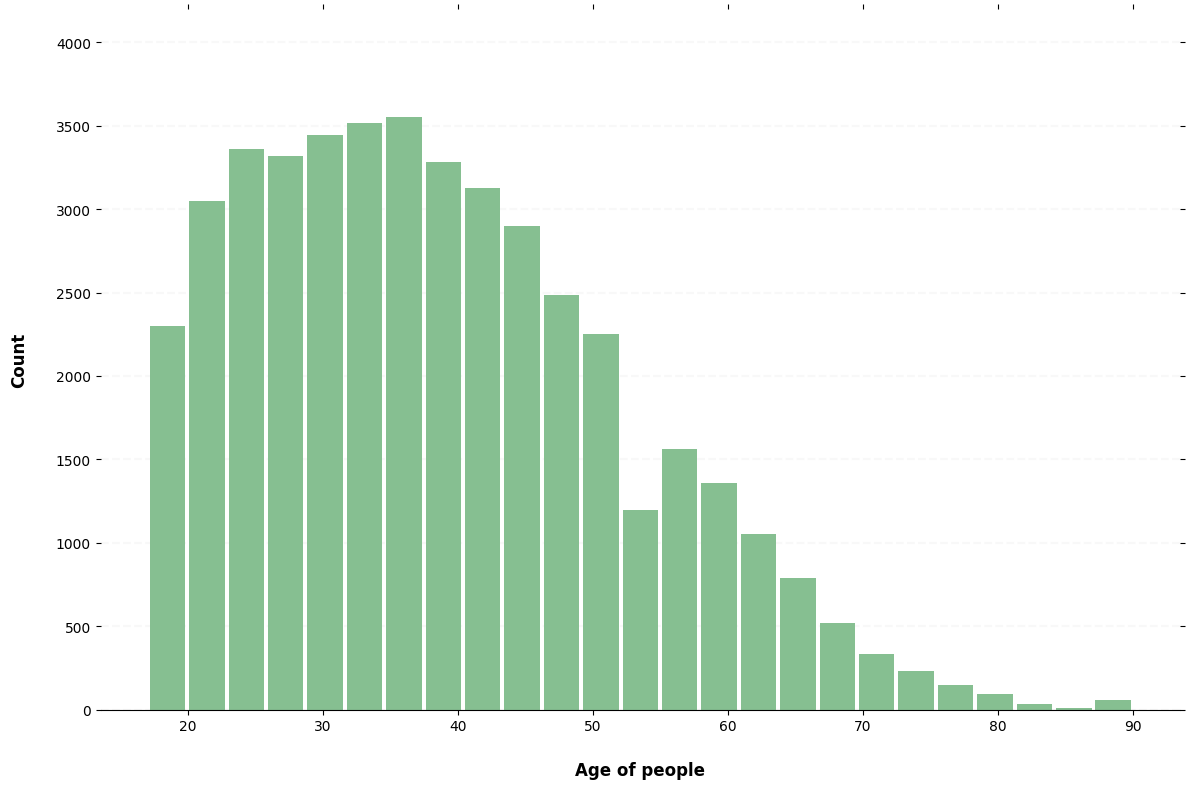

In [15]:
ax = df.hist(column='age', bins=25, grid=False, figsize=(12,8), color='#86bf91', zorder=2, rwidth=0.9)

ax = ax[0]
for x in ax:

    # Despine
    x.spines['right'].set_visible(False)
    x.spines['top'].set_visible(False)
    x.spines['left'].set_visible(False)

    # Switch off ticks
    x.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

    # Draw horizontal axis lines
    vals = x.get_yticks()
    for tick in vals:
        x.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

    # Remove title
    x.set_title("")

    # Set x-axis label
    x.set_xlabel("Age of people", labelpad=20, weight='bold', size=12)

    # Set y-axis label
    x.set_ylabel("Count", labelpad=20, weight='bold', size=12)

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)


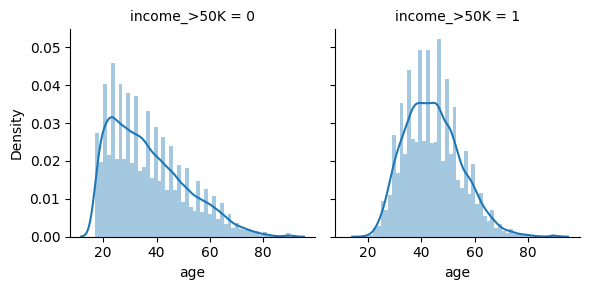

In [16]:
grid = sns.FacetGrid(df, col='income_>50K')
grid = grid.map(sns.distplot, "age")

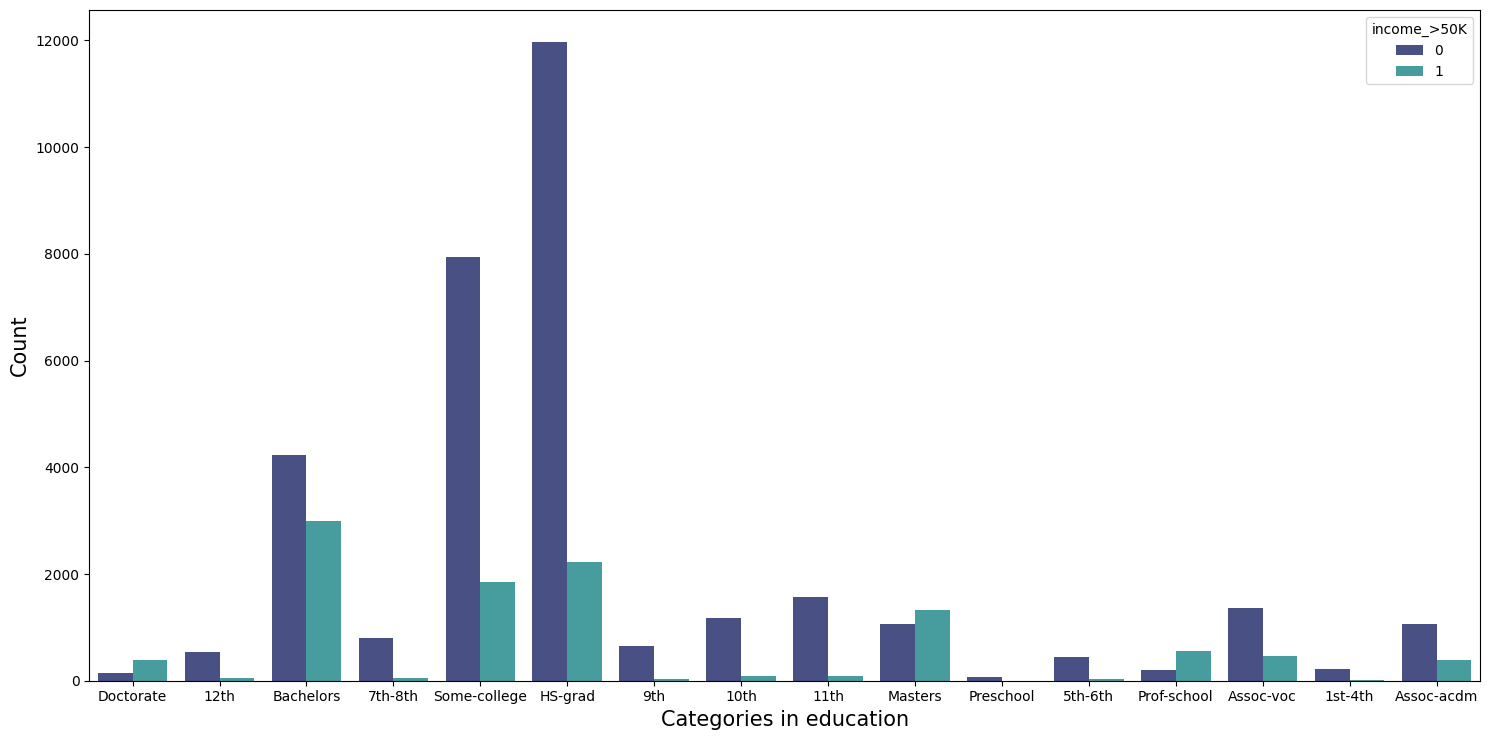

In [18]:
sns.countplot(data=df,x='education', hue='income_>50K',palette='mako')
plt.rcParams["figure.figsize"] = [10.00, 13.50]
plt.rcParams["figure.autolayout"] = True
plt.ylabel("Count", size=15);
plt.xlabel("Categories in education", size=15);

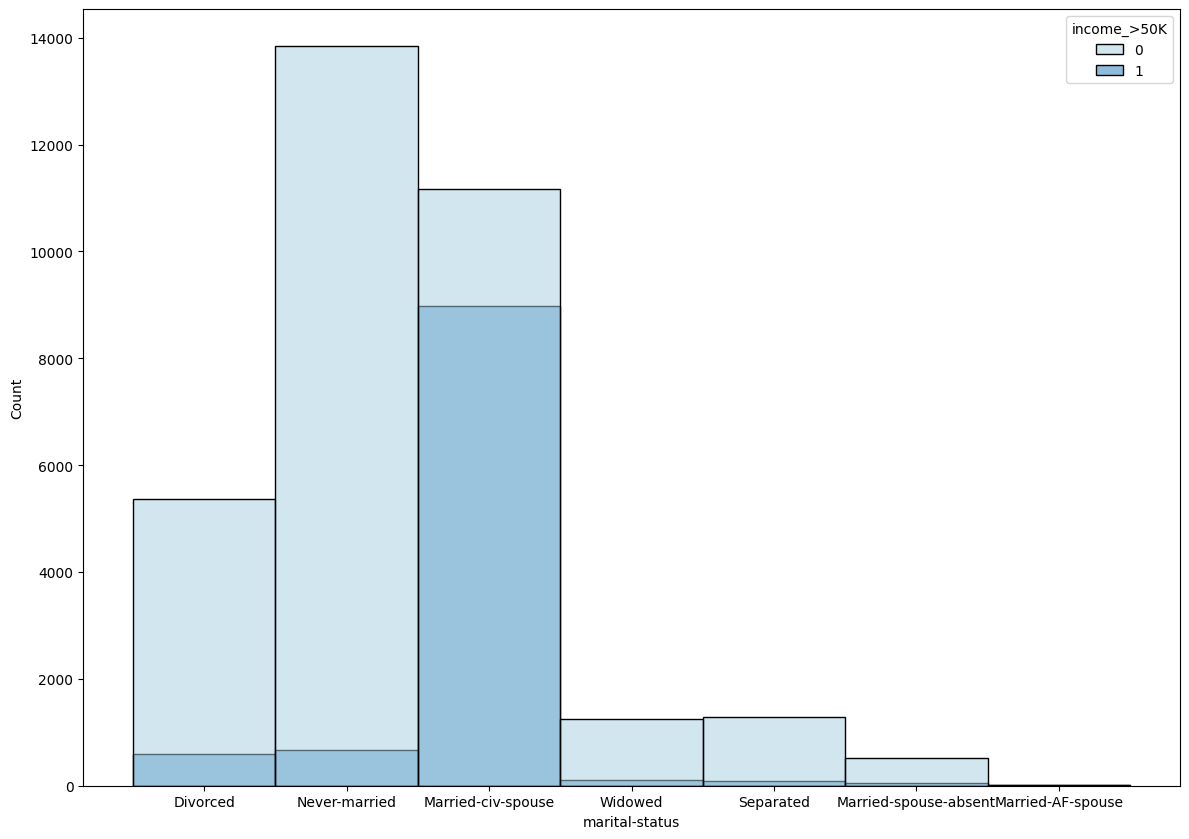

In [79]:
ax= sns.histplot(x=df['marital-status'], hue=df['income_>50K'],palette='Paired')
plt.rcParams["figure.figsize"] = [10.00, 8.50]
plt.rcParams["figure.autolayout"] = True


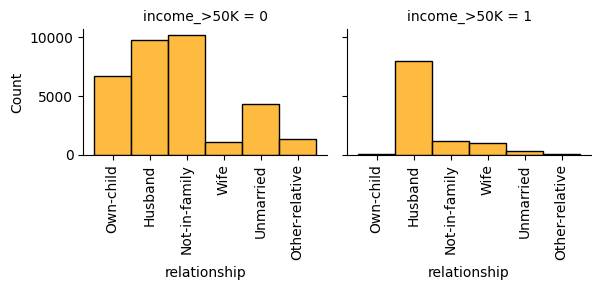

In [29]:
g = sns.FacetGrid(df, col = 'income_>50K')
g.map_dataframe(sns.histplot, x="relationship", bins = 20, color='orange').add_legend();
g.set_xticklabels(rotation=90)

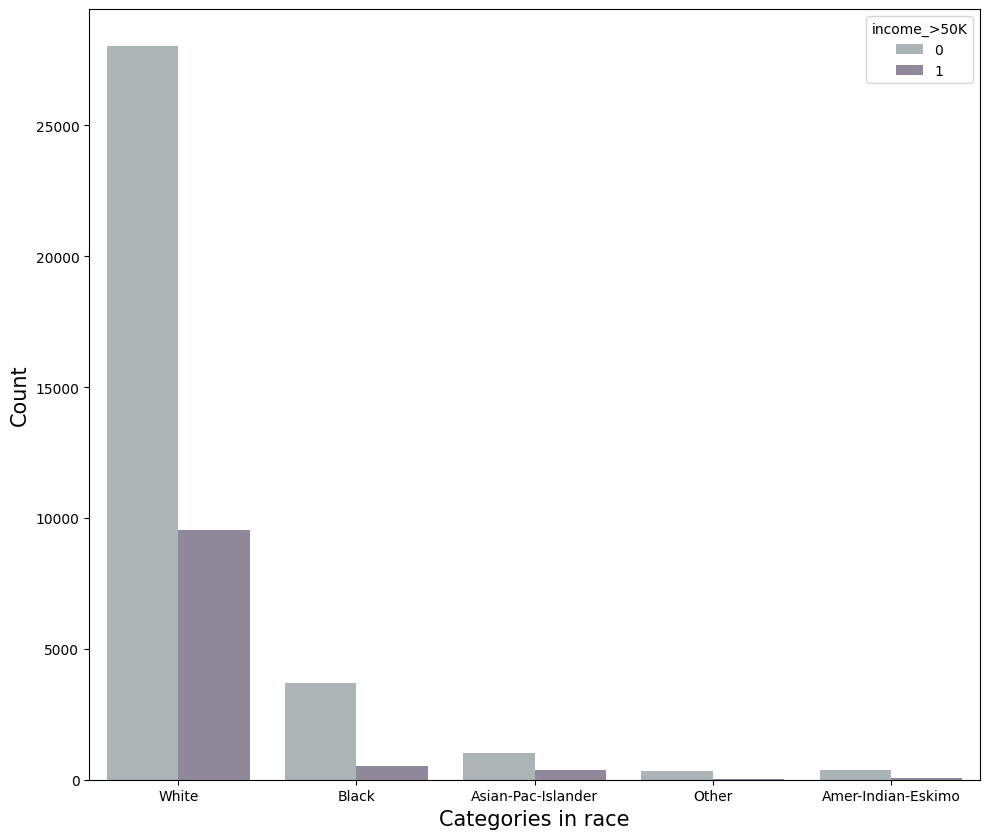

In [80]:
sns.countplot(x=df['race'],data=df, hue='income_>50K', palette= 'Accent_d')
plt.ylabel("Count", size=15)
plt.xlabel("Categories in race", size=15);
plt.rcParams["figure.figsize"] = [10.00, 8.50]
plt.rcParams["figure.autolayout"] = True

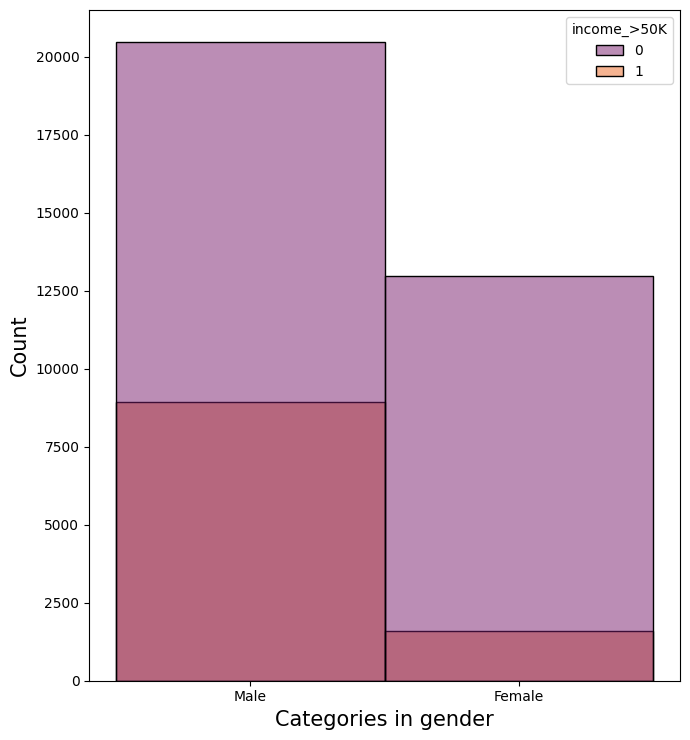

In [82]:
sns.histplot(x=df['gender'],data=df, hue='income_>50K', palette= 'inferno')
plt.rcParams["figure.figsize"] = [7.00, 7.00]
plt.rcParams["figure.autolayout"] = True
plt.ylabel("Count", size=15)
plt.xlabel("Categories in gender", size=15);

In [36]:
aux = df.copy(deep=True)
aux.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income_>50K
0,67,Private,366425,Doctorate,16,Divorced,Exec-managerial,Not-in-family,White,Male,99999,0,60,United-States,1
1,17,Private,244602,12th,8,Never-married,Other-service,Own-child,White,Male,0,0,15,United-States,0
2,31,Private,174201,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,1
3,58,State-gov,110199,7th-8th,4,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,0
4,25,State-gov,149248,Some-college,10,Never-married,Other-service,Not-in-family,Black,Male,0,0,40,United-States,0


In [37]:
wrk_govt = [ 'State-gov','Federal-gov','Local-gov']
wrk_unemployed =['nan', 'Never-worked', 'Without-pay']
wrk_self = ['Self-emp-not-inc','Self-emp-inc']
for wrk in wrk_govt:
    aux['workclass'] = aux['workclass'].replace({wrk:'govt'})
for wrk in wrk_unemployed:
    aux['workclass'] = aux['workclass'].replace({wrk:'unemployed'})
for wrk in wrk_self:
    aux['workclass'] = aux['workclass'].replace({wrk:'self-emp'})

edu_hs = ['1st-4th', '5th-6th','7th-8th', '9th', '10th', '11th','12th','HS-grad']
edu_ass= ['Assoc-voc','Assoc-acdm','Some-college','Prof-school']

for edu in edu_hs :
    aux['education']=aux['education'].replace({edu:'High-school'})
for edu in edu_ass:
    aux.education = aux.education.replace({edu:'Association'})

mar_single = ['Separated','Widowed','Married-spouse-absent']
mar_marriage =['Married-civ-spouse','Married-AF-spouse']

for mar in mar_single:
    aux['marital-status'] =  aux['marital-status'].replace({mar:'Single'})
for mar in mar_marriage:
    aux['marital-status'] =  aux['marital-status'].replace({mar:'Married'})

rel_mar = ['Husband', 'Wife']

for rel in rel_mar:
    aux.relationship = aux.relationship.replace({rel:'Married'})

c_nna = ['United-States','Mexico','Dominican-Republic','Puerto-Rico','Cuba','El-Salvador','Canada','Guatemala','Haiti','Nicaragua','Honduras','Jamaica','Outlying-US(Guam-USVI-etc)']
c_sa= ['Ecuador','Columbia','Peru','Trinadad&Tobago','South']
c_asia= ['Japan','Philippines','China','Vietnam','Thailand','India','Cambodia','Iran','Taiwan','Laos','Hong']
c_europe = ['Portugal','Italy','England','Germany','Yugoslavia','Poland','Greece', 'Ireland','Scotland','France','Hungary','Holand-Netherlands']

for c in c_nna:
    aux['native-country'] = aux['native-country'].replace({c:'Central and North America'})
for c in c_sa:
    aux['native-country'] = aux['native-country'].replace({c:'South America'})
for c in c_asia:
    aux['native-country']=aux['native-country'].replace({c:'Asia'})
for c in c_europe:
    aux['native-country'] = aux['native-country'].replace({c:'Europe'})


In [38]:
cat_features = [col for col in list(aux.columns) if aux[col].dtypes==object]
cat_features

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'gender',
 'native-country']

In [39]:
num_features = [col for col in list(aux.columns) if aux[col].dtypes!=object and col!='income_>50K']
num_features

['age',
 'fnlwgt',
 'educational-num',
 'capital-gain',
 'capital-loss',
 'hours-per-week']

In [40]:
d = LabelEncoder()

for col in aux[cat_features]:
    aux[col]= d.fit_transform(aux[col])
aux.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income_>50K
0,67,0,366425,2,16,0,3,1,4,1,99999,0,60,1,1
1,17,0,244602,3,8,2,7,3,4,1,0,0,15,1,0
2,31,0,174201,1,13,1,3,0,4,1,0,0,40,1,1
3,58,1,110199,3,4,1,13,0,4,1,0,0,40,1,0
4,25,1,149248,0,10,2,7,1,2,1,0,0,40,1,0


In [41]:
scaler = MinMaxScaler()
aux[num_features] = scaler.fit_transform(aux[num_features])
aux.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income_>50K
0,0.684932,0,0.238967,2,1.000000,0,3,1,4,1,1.0,0.0,0.602041,1,1
1,0.000000,0,0.156482,3,0.466667,2,7,3,4,1,0.0,0.0,0.142857,1,0
2,0.191781,0,0.108814,1,0.800000,1,3,0,4,1,0.0,0.0,0.397959,1,1
3,0.561644,1,0.065479,3,0.200000,1,13,0,4,1,0.0,0.0,0.397959,1,0
4,0.109589,1,0.091919,0,0.600000,2,7,1,2,1,0.0,0.0,0.397959,1,0


In [42]:
X = aux.drop("income_>50K",axis=1)
print("X shape(features) : ",X.shape)

X shape(features) :  (43957, 14)


In [43]:
y = aux['income_>50K']
print("y(target), shape : ",y.shape)

y(target), shape :  (43957,)


The number of samples where the income is >= 50K :  10518
The number of samples where the income is not >= 50K :  33439
The ratio of people earning more than 50K and those lesser than 50K :  0.31


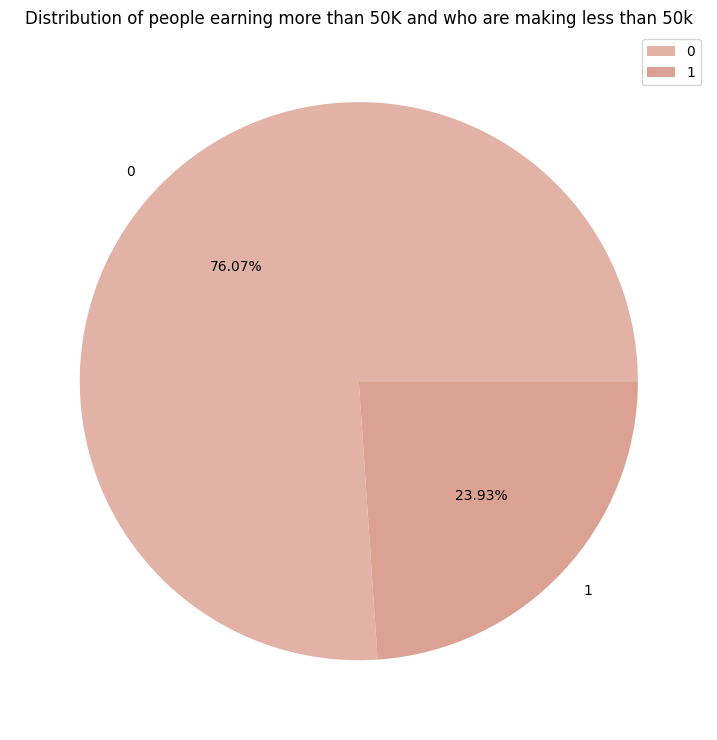

In [44]:
print("The number of samples where the income is >= 50K : ",df.loc[df['income_>50K']==1].count()['income_>50K'])
print("The number of samples where the income is not >= 50K : ",df.loc[df['income_>50K']==0].count()['income_>50K'])

print("The ratio of people earning more than 50K and those lesser than 50K : ",round(df.loc[df['income_>50K']==1].count()['income_>50K']/df.loc[df['income_>50K']==0].count()['income_>50K'],2))

how = pd.DataFrame(aux['income_>50K'].value_counts(normalize=True)*100)
color = ['#e2b2a7', '#dba294']
plt.pie(how['income_>50K'], labels=how.index,  autopct= '%2.2f%%', colors=color)
plt.legend(how.index)
plt.title('Distribution of people earning more than 50K and who are making less than 50k')
plt.show()

In [45]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

In [46]:
print('X_train size : ',X_train.shape)
print('X_test size : ',X_test.shape)
print('y_train size : ',y_train.shape)
print('y_test size : ',y_test.shape)

X_train size :  (30769, 14)
X_test size :  (13188, 14)
y_train size :  (30769,)
y_test size :  (13188,)


In [49]:
from sklearn.tree import DecisionTreeClassifier
DecisionTree = DecisionTreeClassifier(criterion='gini',
                                      max_depth=3,
                                      random_state=10)
DecisionTree.fit(X_train, y_train)

y_pred_1 = DecisionTree.predict(X_test)

In [51]:
mae_1 = np.mean(abs(y_pred_1-y_test))
rmse_1 = np.sqrt(np.mean((y_pred_1-y_test)**2))
rae_1 = np.mean(abs(y_pred_1-y_test))/np.mean(abs(y_test-np.mean(y_test)))
rse_1 = np.mean((y_pred_1-y_test)**2)/np.mean((y_test-np.mean(y_test))**2)
r2_1 = DecisionTree.score(X_test, y_test)

print("The R-squared value is: {0:0.4f}".format(r2_1))
print("Mean Absolute Error: {0:0.6f}".format(mae_1))
print("Root Mean Squared Error: {0:0.6f}".format(rmse_1))
print("Relative Absolute Error: {0:0.6f}".format(rae_1))
print("Relative Squared Error: {0:0.6f}".format(rse_1))

The R-squared value is: 0.8424
Mean Absolute Error: 0.157567
Root Mean Squared Error: 0.396948
Relative Absolute Error: 0.428986
Relative Squared Error: 0.857972


In [52]:
feature_names = X_train.columns

In [55]:
from sklearn.neighbors import KNeighborsClassifier
KNClassifier = KNeighborsClassifier(n_neighbors= 3)
KNClassifier.fit(X_train, y_train)
y_pred_2 = KNClassifier.predict(X_test)

In [56]:
mae_2 = np.mean(abs(y_pred_2-y_test))
rmse_2 = np.sqrt(np.mean((y_pred_2-y_test)**2))
rae_2 = np.mean(abs(y_pred_2-y_test))/np.mean(abs(y_test-np.mean(y_test)))
rse_2 = np.mean((y_pred_2-y_test)**2)/np.mean((y_test-np.mean(y_test))**2)
r2_2 = KNClassifier.score(X_test, y_test)

print("The R-squared value is: {0:0.4f}".format(r2_2))
print("Mean Absolute Error: {0:0.6f}".format(mae_2))
print("Root Mean Squared Error: {0:0.6f}".format(rmse_2))
print("Relative Absolute Error: {0:0.6f}".format(rae_2))
print("Relative Squared Error: {0:0.6f}".format(rse_2))

The R-squared value is: 0.8074
Mean Absolute Error: 0.192599
Root Mean Squared Error: 0.438861
Relative Absolute Error: 0.524362
Relative Squared Error: 1.048724


In [57]:
from sklearn.linear_model import LogisticRegression
LG = LogisticRegression(random_state=0)
LG.fit(X_train, y_train)
y_pred_3 = LG.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [58]:
mae_3 = np.mean(abs(y_pred_3-y_test))
rmse_3 = np.sqrt(np.mean((y_pred_3-y_test)**2))
rae_3 = np.mean(abs(y_pred_3-y_test))/np.mean(abs(y_test-np.mean(y_test)))
rse_3 = np.mean((y_pred_3-y_test)**2)/np.mean((y_test-np.mean(y_test))**2)
r2_3 = LG.score(X_test, y_test)

print("The R-squared value is: {0:0.4f}".format(r2_3))
print("Mean Absolute Error: {0:0.6f}".format(mae_3))
print("Root Mean Squared Error: {0:0.6f}".format(rmse_3))
print("Relative Absolute Error: {0:0.6f}".format(rae_3))
print("Relative Squared Error: {0:0.6f}".format(rse_3))

The R-squared value is: 0.8378
Mean Absolute Error: 0.162193
Root Mean Squared Error: 0.402732
Relative Absolute Error: 0.441579
Relative Squared Error: 0.883157


In [59]:
from sklearn.ensemble import GradientBoostingClassifier
GBC = GradientBoostingClassifier()
GBC.fit(X_train, y_train)
y_pred_4 = GBC.predict(X_test)

In [60]:
mae_4 = np.mean(abs(y_pred_4-y_test))
rmse_4 = np.sqrt(np.mean((y_pred_4-y_test)**2))
rae_4 = np.mean(abs(y_pred_4-y_test))/np.mean(abs(y_test-np.mean(y_test)))
rse_4 = np.mean((y_pred_4-y_test)**2)/np.mean((y_test-np.mean(y_test))**2)
r2_4 = GBC.score(X_test, y_test)

print("The R-squared value is: {0:0.4f}".format(r2_4))
print("Mean Absolute Error: {0:0.6f}".format(mae_4))
print("Root Mean Squared Error: {0:0.6f}".format(rmse_4))
print("Relative Absolute Error: {0:0.6f}".format(rae_4))
print("Relative Squared Error: {0:0.6f}".format(rse_4))

The R-squared value is: 0.8658
Mean Absolute Error: 0.134213
Root Mean Squared Error: 0.366351
Relative Absolute Error: 0.365402
Relative Squared Error: 0.730803


In [61]:
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier(criterion = 'gini',
                             n_estimators = 150,
                            max_depth = 5,)
RFC.fit(X_train, y_train)
y_pred_5 = RFC.predict(X_test)

In [62]:
mae_5 = np.mean(abs(y_pred_5-y_test))
rmse_5 = np.sqrt(np.mean((y_pred_5-y_test)**2))
rae_5 = np.mean(abs(y_pred_5-y_test))/np.mean(abs(y_test-np.mean(y_test)))
rse_5 = np.mean((y_pred_5-y_test)**2)/np.mean((y_test-np.mean(y_test))**2)
r2_5 = RFC.score(X_test, y_test)

print("The R-squared value is: {0:0.4f}".format(r2_5))
print("Mean Absolute Error: {0:0.6f}".format(mae_5))
print("Root Mean Squared Error: {0:0.6f}".format(rmse_5))
print("Relative Absolute Error: {0:0.6f}".format(rae_5))
print("Relative Squared Error: {0:0.6f}".format(rse_5))

The R-squared value is: 0.8517
Mean Absolute Error: 0.148317
Root Mean Squared Error: 0.385119
Relative Absolute Error: 0.403800
Relative Squared Error: 0.807600


In [63]:
def result_models():
    models = ['DecisionTreeClassifier', 'KNeighborsClassifier',
             'LogisticRegression', 'GradientBostingClassifier',
             'Rando,ForestClassifier']
    mae = [mae_1, mae_2, mae_3, mae_4, mae_5]
    rmse = [rmse_1, rmse_2, rmse_3, rmse_4, rmse_5]
    rae = [rae_1, rae_2, rae_3, rae_4, rae_5]
    rse = [rse_1, rse_2, rse_3, rse_4, rse_5]
    r2 = [r2_1, r2_2, r2_3, r2_4, r2_5]

    data = [mae, rmse, rae, rse, r2]
    df = pd.DataFrame(data).T
    df.columns = ['mae','rmse', 'rae', 'rse', 'r2']
    df.insert(0,'model', models)
    return df

In [64]:
result_models = result_models()
result_models

,model,mae,rmse,rae,rse,r2
0,DecisionTreeClassifier,0.157567,0.396948,0.428986,0.857972,0.842433
1,KNeighborsClassifier,0.192599,0.438861,0.524362,1.048724,0.807401
2,LogisticRegression,0.162193,0.402732,0.441579,0.883157,0.837807
3,GradientBostingClassifier,0.134213,0.366351,0.365402,0.730803,0.865787
4,"Rando,ForestClassifier",0.148317,0.385119,0.403800,0.807600,0.851683


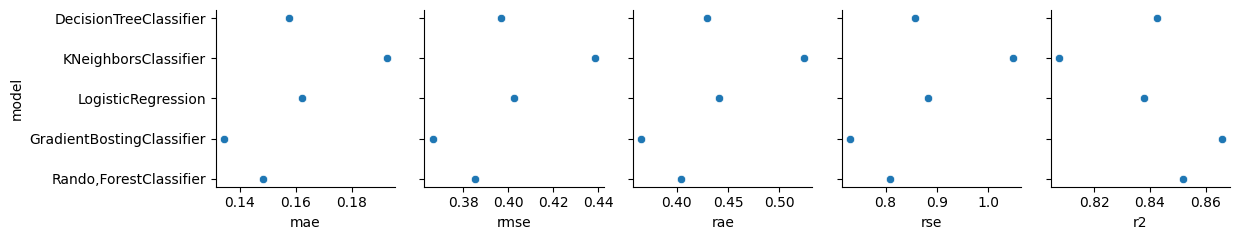

In [65]:
sns.pairplot(result_models,
             y_vars = 'model', x_vars = ['mae','rmse','rae','rse','r2'])